In [ ]:
# !pip install transformer-ranker
# !pip install -U datasets
from datasets import load_dataset,Dataset,DatasetDict
# from transformer_ranker import TransformerRanker, prepare_popular_models


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth',None)

In [ ]:
# EDA
df = pd.read_csv("gold_labels_deduplicated.csv")
df = df.loc[:, ~df.columns.str.startswith("Unnamed")]
df.info()

df2 = pd.read_csv("ACL_toAnnotate_IAA.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          1921 non-null   int64 
 1   joke           1921 non-null   object
 2   gold_label     1921 non-null   object
 3   gold_target    1921 non-null   object
 4   gold_rhetoric  1921 non-null   object
 5   stereotype     48 non-null     object
 6   target         81 non-null     object
 7   device         106 non-null    object
dtypes: int64(1), object(7)
memory usage: 120.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   joke            2538 non-null   object
 1   stereotype_SSB  1100 non-null   object
 2   Unnamed: 2      35 non-null     object
 3   target_SSB      909 non-null    object
 4   Unnamed: 4      78 non-null     objec

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


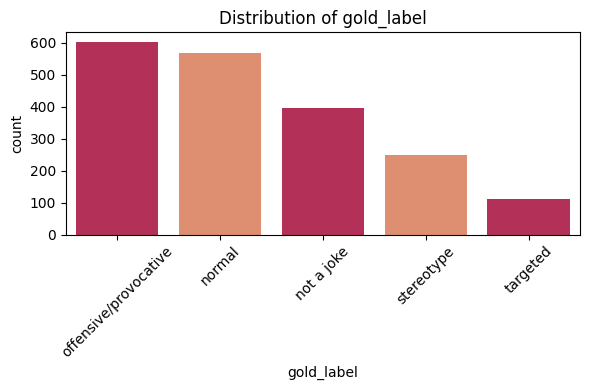

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


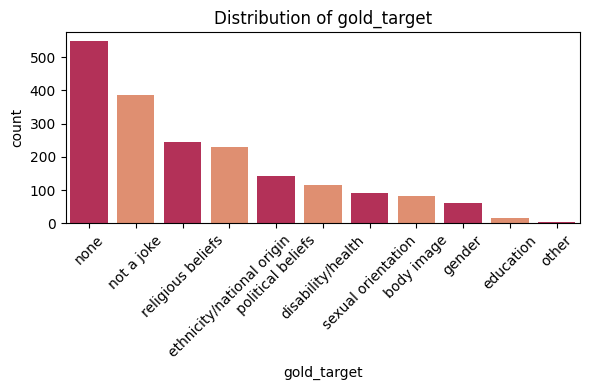

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


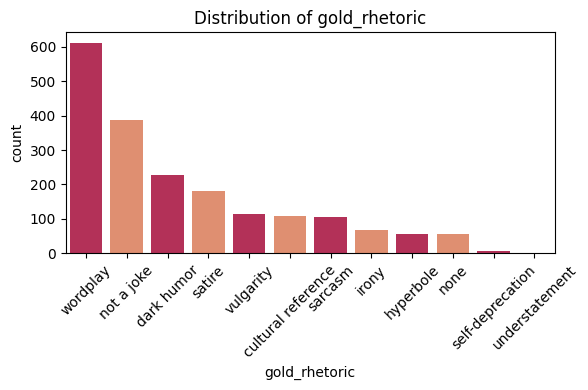

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


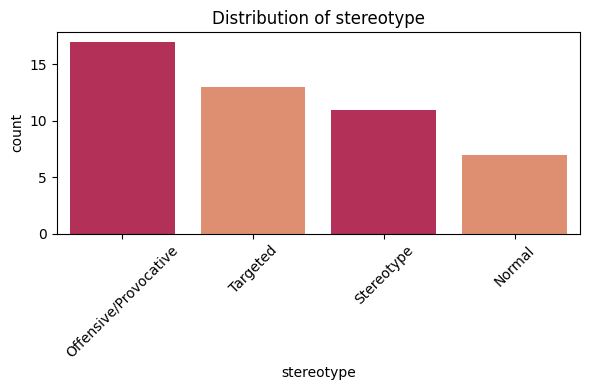

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


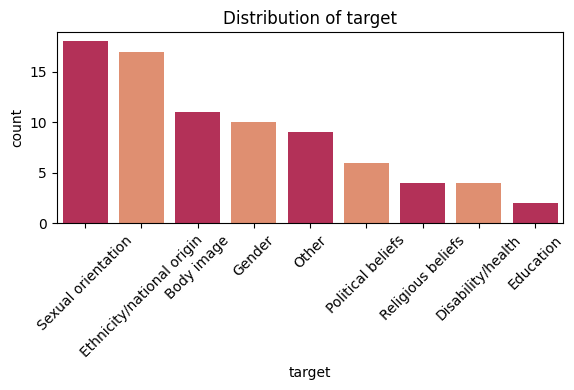

/tmp/ipython-input-3170281918.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
/tmp/ipython-input-3170281918.py:14: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here


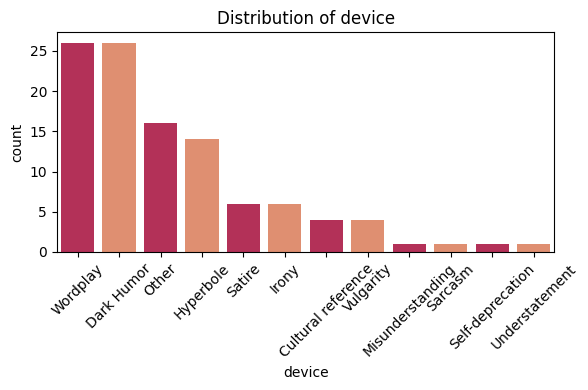

In [ ]:
#  EDA
categorical_cols = df.iloc[:,2:]
# for col in categorical_cols:
#     print(f"\nColumn: {col}")
#     print(df[col].value_counts(normalize=True))  # Relative frequencies

import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#c81c50', '#f2865e']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette=colors)  # Use the palette argument here
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:

df = df[["joke","gold_rhetoric"]].rename(columns = {"gold_rhetoric":"rhetoric"})
#cleaned, no na, no duplicates (tested)

In [ ]:
from datasets import DatasetDict

# For example, use 80/20 split
train_df = df.sample(frac=0.8, random_state=42)
valid_df = df.drop(train_df.index)

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(valid_df)
})


In [ ]:
def df_preprocess(dataset):
    df = dataset['train'].to_pandas()
    df = df[['joke', 'rhetoric']]
    # merge same category between cased/uncased
    df['rhetoric'] = df['rhetoric'].str.lower()
    # select only jokes
    df = df[df['rhetoric'] != 'not a joke']
    # uncase jokes to use uncased pretrained model
    df['joke'] = df['joke'].str.lower()
    df = df.rename(columns={'joke': 'text', 'rhetoric': 'labels'})
    # Drop rows where 'labels' is None
    df = df.dropna(subset=['labels'])
    return df

train_data = load_dataset('csv',data_files = "train.csv")
val_data = load_dataset('csv',data_files="validation.csv")

train_df = df_preprocess(train_data)
val_df = df_preprocess(val_data)

dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df),
    "validation": Dataset.from_pandas(val_df)
})


In [ ]:
language_models = prepare_popular_models('base')
# language_models = ["bert-base-cased", "bert-base-uncased"]

# Step 3: Initialize the ranker with the dataset
ranker = TransformerRanker(dataset, text_column = 'text',label_column='labels', dataset_downsample=0.2)

# ... and run the ranker to obtain the ranking
results = ranker.run(language_models, batch_size=64)

Removing empty rows:   0%|          | 0/481 [00:00<?, ? examples/s]

Converting string labels to integers:   0%|          | 0/481 [00:00<?, ? examples/s]

transformer_ranker:Task category: text classification
transformer_ranker:Text column: 'text', label column: 'labels'
transformer_ranker:Dataset size: 481 texts, reduced to 20% of original.
transformer_ranker:Label map: {'cultural reference': 0, 'dark humor': 1, 'gender': 2, 'hyperbole': 3, 'irony': 4, 'none': 5, 'other': 6, 'puns': 7, 'sarcasm': 8, 'satire': 9, 'self-deprecation': 10, 'vulgarity': 11, 'wordplay': 12}
transformer_ranker:Downloading models: {'german-nlp-group/electra-base-german-uncased', 'Twitter/twhin-bert-base', 'SpanBERT/spanbert-base-cased', 'sentence-transformers/all-mpnet-base-v2', 'typeform/distilroberta-base-v2', 'KISTI-AI/scideberta', 'roberta-base', 'dmis-lab/biobert-base-cased-v1.2', 'distilbert-base-cased', 'google/electra-small-discriminator', 'bert-base-cased', 'microsoft/deberta-v3-base', 'microsoft/mdeberta-v3-base', 'google/electra-base-discriminator', 'Lianglab/PharmBERT-cased', 'sentence-transformers/all-MiniLM-L12-v2', 'FacebookAI/xlm-roberta-base'}


config.json:   0%|          | 0.00/467 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/103 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/632 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/372 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/215M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/215M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/331M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/763 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/557M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/557M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/371M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/371M [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/686 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Transferability score: 100%|██████████| 1/1 [00:02<00:00,  2.33s/it]
transformer_ranker:distilbert-base-cased hscore: 7.3930
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.66s/it]
transformer_ranker:typeform/distilroberta-base-v2 hscore: 7.7262
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]
transformer_ranker:bert-base-cased hscore: 7.4658
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]
transformer_ranker:SpanBERT/spanbert-base-cased hscore: 7.6318
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]
transformer_ranker:roberta-base hscore: 7.9013
Transferability score: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]
transformer_ranker:google/electra-small-discriminator hscore: 4.6578
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]
transformer_ranker:google/electra-base-discriminator hscore: 8.4994
Transferability score: 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]
transformer_ranker:microsoft/d

In [ ]:
print(results)

Rank 1. microsoft/mdeberta-v3-base: 8.7393
Rank 2. google/electra-base-discriminator: 8.4994
Rank 3. german-nlp-group/electra-base-german-uncased: 8.3132
Rank 4. FacebookAI/xlm-roberta-base: 8.1906
Rank 5. KISTI-AI/scideberta: 8.1553
Rank 6. Twitter/twhin-bert-base: 8.0623
Rank 7. microsoft/deberta-v3-base: 8.0377
Rank 8. roberta-base: 7.9013
Rank 9. typeform/distilroberta-base-v2: 7.7262
Rank 10. dmis-lab/biobert-base-cased-v1.2: 7.7236
Rank 11. SpanBERT/spanbert-base-cased: 7.6318
Rank 12. Lianglab/PharmBERT-cased: 7.5212
Rank 13. bert-base-cased: 7.4658
Rank 14. distilbert-base-cased: 7.3930
Rank 15. sentence-transformers/all-mpnet-base-v2: 7.1035
Rank 16. sentence-transformers/all-MiniLM-L12-v2: 5.1593
Rank 17. google/electra-small-discriminator: 4.6578
